In [75]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import FileLink



In [76]:
# Load datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID')


In [77]:

# Feature Engineering
customer_features = merged_data.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    total_transactions=('TransactionID', 'count'),
    avg_transaction_value=('TotalValue', 'mean')
).reset_index()

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.drop(columns='CustomerID'))



In [78]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)


In [79]:

# Evaluate clustering with Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, customer_features['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 0.9088862131710539


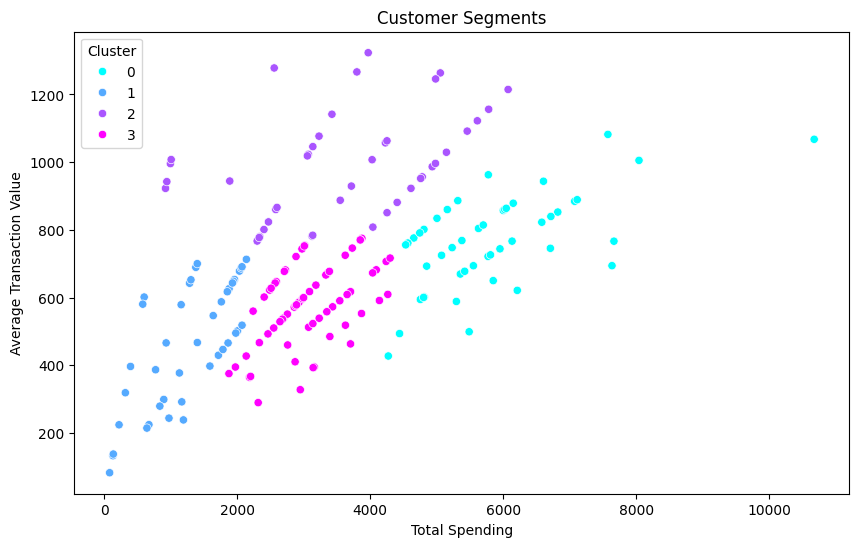

In [80]:

# Visualize Clusters
# Customer Segments
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=customer_features['total_spent'],
    y=customer_features['avg_transaction_value'],
    hue=customer_features['Cluster'],
    palette='cool'
)
plt.title('Customer Segments')
plt.xlabel('Total Spending')
plt.ylabel('Average Transaction Value')
plt.legend(title='Cluster')
plt.show()


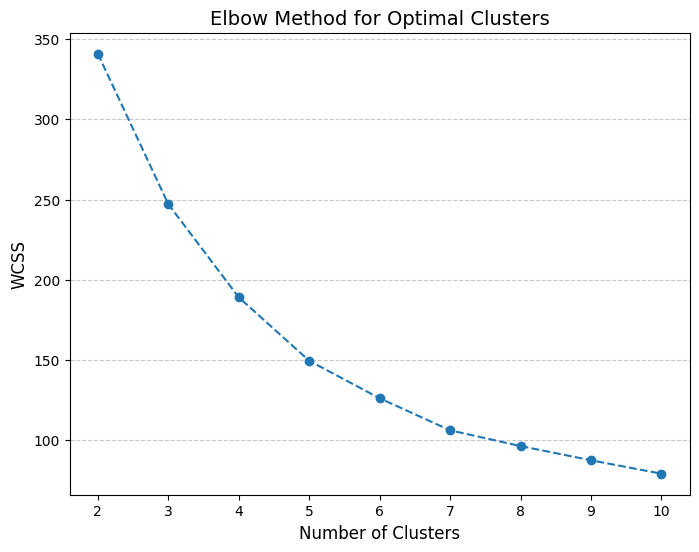

In [81]:

# Elbow Plot for Optimal Number of Clusters
wcss = []
for n_clusters in range(2, 11):  # Test cluster numbers from 2 to 10
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [82]:

# Pair Plot of Clusters
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# Ensure no infinite values in the dataset
customer_features.replace([np.inf, -np.inf], np.nan, inplace=True)
customer_features.dropna(inplace=True)


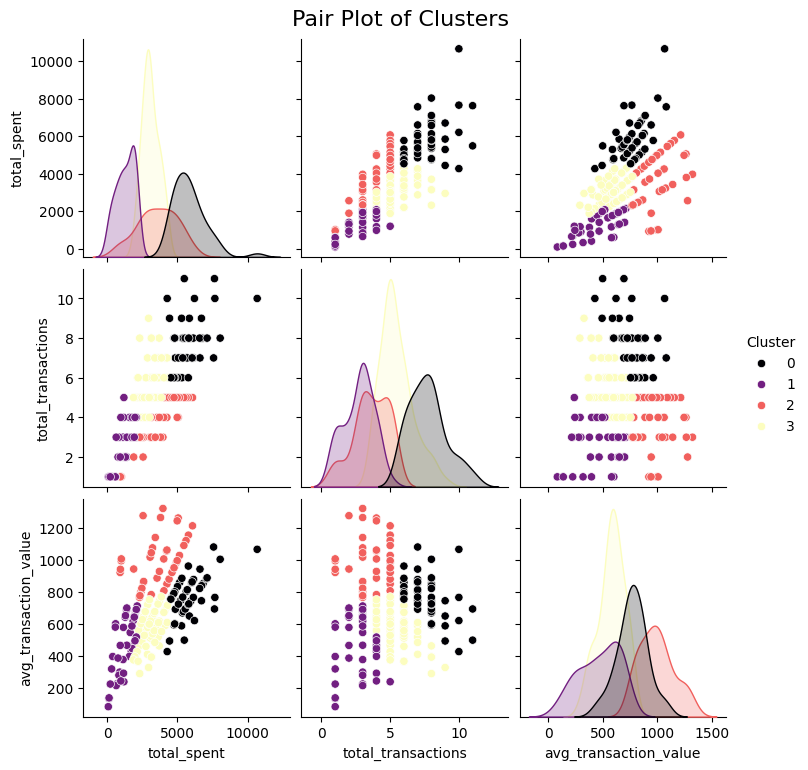

In [83]:

# Create Pair Plot
sns.pairplot(
    customer_features,
    vars=['total_spent', 'total_transactions', 'avg_transaction_value'],
    hue='Cluster',
    palette='magma'
)
plt.suptitle('Pair Plot of Clusters', y=1.02, fontsize=16)
plt.show()



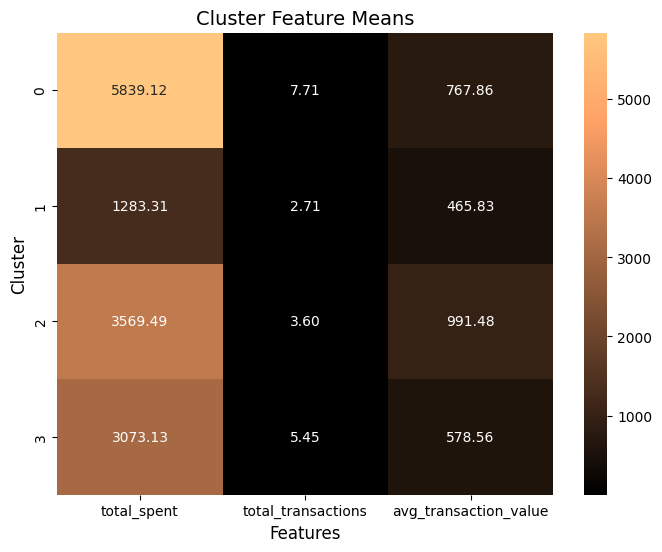

In [84]:
# Heatmap of Feature Means for Each Cluster
cluster_means = customer_features.groupby('Cluster')[['total_spent', 'total_transactions', 'avg_transaction_value']].mean()
plt.figure(figsize=(8, 6))
sns.heatmap(cluster_means, annot=True, cmap='copper', fmt='.2f')
plt.title('Cluster Feature Means', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Cluster', fontsize=12)
plt.show()


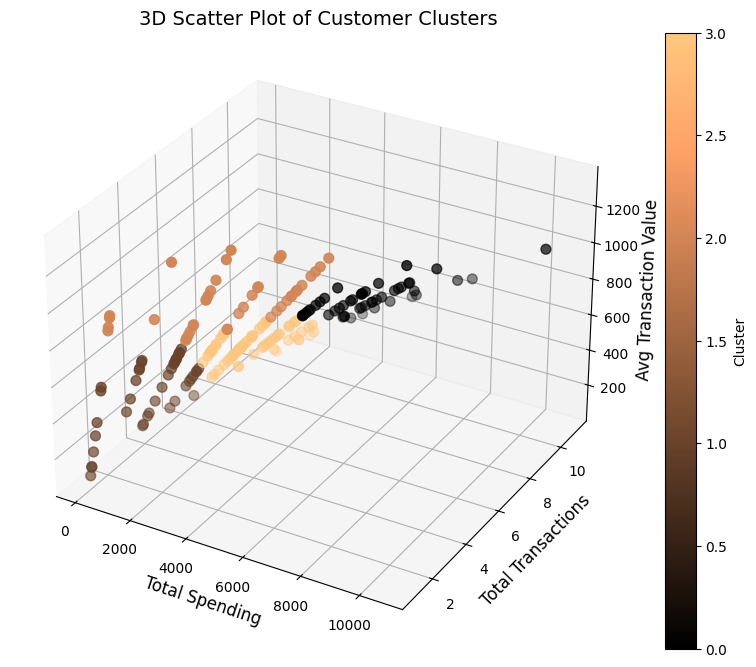

In [85]:

# 3D Scatter Plot for Clusters
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(
    customer_features['total_spent'],
    customer_features['total_transactions'],
    customer_features['avg_transaction_value'],
    c=customer_features['Cluster'], cmap='copper', s=50
)
ax.set_title('3D Scatter Plot of Customer Clusters', fontsize=14)
ax.set_xlabel('Total Spending', fontsize=12)
ax.set_ylabel('Total Transactions', fontsize=12)
ax.set_zlabel('Avg Transaction Value', fontsize=12)
plt.colorbar(sc, ax=ax, label='Cluster')
plt.show()


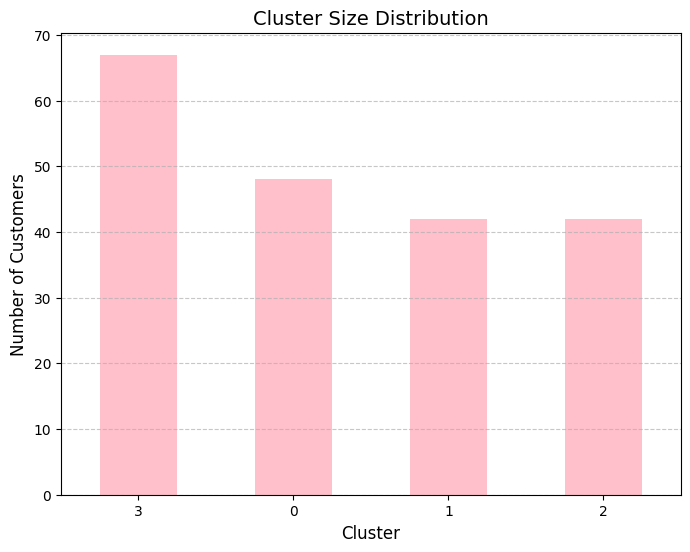

/content/customer_segments.csv

In [86]:

# Cluster Size Distribution
cluster_sizes = customer_features['Cluster'].value_counts()
plt.figure(figsize=(8, 6))
cluster_sizes.plot(kind='bar', color='pink')
plt.title('Cluster Size Distribution', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Save results to CSV
customer_features.to_csv('customer_segments.csv', index=False)

# Create a link to download the CSV file
FileLink(r'customer_segments.csv')